***Question 9 -Write a program to read the data from the following link, perform data analysis and answer the following
questions***

***Note - 1. Write code comments wherever required for code understanding***

***Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -

***● Get all the cars and their types that do not qualify for clean alternative fuel vehicle***

***● Get all TESLA cars with the model year, and model type made in Bothell City***

***● Get all the cars that have an electric range of more than 100, and were made after
2015***

***● Draw plots to show the distribution between city and electric vehicle type***

In [1]:
import pandas as pd

# Read the CSV data from the provided link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
data = pd.read_csv(url)

In [3]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
# Print the column names
print(data.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [10]:
import matplotlib.pyplot as plt

# Get unique values in a column
unique_values = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

# Print the unique values
print("Unique values in the column:")
print(unique_values)

Unique values in the column:
['Clean Alternative Fuel Vehicle Eligible'
 'Not eligible due to low battery range'
 'Eligibility unknown as battery range has not been researched']


In [15]:
 ##Cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_cars = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range'][['Make', 'Model']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_cars)

Cars and their types that do not qualify for clean alternative fuel vehicle:
          Make        Model
6         FORD       FUSION
7         AUDI         Q5 E
8         FORD        C-MAX
14        FORD        C-MAX
15         KIA         NIRO
...        ...          ...
130377     BMW         530E
130385    AUDI           A3
130390    JEEP     WRANGLER
130407  TOYOTA  PRIUS PRIME
130437     BMW         530E

[16446 rows x 2 columns]


In [16]:
non_clean_cars

,Make,Model
6,FORD,FUSION
7,AUDI,Q5 E
8,FORD,C-MAX
14,FORD,C-MAX
15,KIA,NIRO
...,...,...
130377,BMW,530E
130385,AUDI,A3
130390,JEEP,WRANGLER
130407,TOYOTA,PRIUS PRIME


In [18]:
unique_values_city= data['City'].value_counts()
unique_values_city

Seattle        22894
Bellevue        6748
Redmond         4820
Vancouver       4652
Kirkland        4071
               ...  
Asheboro           1
Germantown         1
Saint Jacob        1
Watertown          1
Aurora             1
Name: City, Length: 656, dtype: int64

In [21]:
#  TESLA cars with the model year and model type made in Bothell City
tesla_bothell = data[(data['Make'] == 'TESLA') & (data['City'] == 'BOTHELL')][['Model Year', 'Model']]
print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_bothell)

TESLA cars with the model year and model type made in Bothell City:
Empty DataFrame
Columns: [Model Year, Model]
Index: []


In [22]:
# Cars with electric range > 100 and made after 2015
electric_range_cars = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)][['Make', 'Model']]
print("Cars with electric range > 100 and made after 2015:")
print(electric_range_cars)

Cars with electric range > 100 and made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]


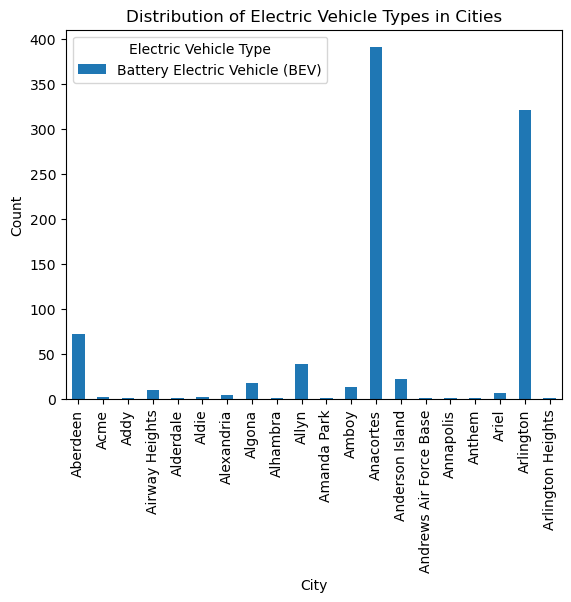

In [24]:
# Draw plots to show the distribution between city and electric vehicle type
ElectricVehicle = data[data["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"]
elv =  ElectricVehicle.loc[:,["City","Electric Vehicle Type"]]


# Group the data by City and Electric Vehicle Type and count the occurrences
counts = elv.groupby(['City', 'Electric Vehicle Type']).size().unstack()[:20]

# Create a bar plot
counts.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types in Cities')
plt.legend(title='Electric Vehicle Type')
plt.show()

In [ ]:
x